In [1]:
import math
import matplotlib.pyplot as plt


# funcion de distancia
def dE(p1, p2):
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)


In [2]:
# Calculo del a, b, y c de la RECTA que corresponde al segmento
# Recibe un segmento, formado por dos puntos:  s es [ [x1, y1 ], [x2, y2] ]
def recta_abc(s):
    # extrae las coordenadas de los puntos
    x1 = s[0][0]
    y1 = s[0][1]

    x2 = s[1][0]
    y2 = s[1][1]

    # Calcula a, b y c
    a = y2 - y1
    b = x1 - x2
    c = a * x1 + b * y1

    return (a, b, c)


In [3]:
# Revisa si un punto pertenece a un segmento
def segmento_interseccion(seg, point):
    dist = dE(seg[0], seg[1])
    dist1 = dE(seg[0], point)
    dist2 = dE(seg[1], point)

    # if dist == dist1 + dist2:
    #     return True

    if abs(dist - (dist1 + dist2)) < 1e-9:
        return True
    
    return False


In [4]:
# A menos que sean paralelas, todo par de rectas intersecta en algun punto
def recta_interseccion(seg1, seg2):
	#  Obten el a, b y c de la recta que corresponde a cada segmento
    a1, b1, c1 = recta_abc(seg1)
    a2, b2, c2 = recta_abc(seg2)

    #  Calcula el determinante
    determinante = a1 * b2 - a2 * b1

    #  Usa el valor del determinate para decidir si se interceptan, o no, y donde
    try:
        x = (b2 * c1 - b1 * c2) / determinante
        y = (a1 * c2 - a2 * c1) / determinante
    
    # Devuelve false si no hay interseccion
    except ZeroDivisionError:
        print("Las rectas son paralelas")
        return False
    
    if(segmento_interseccion(seg1, [x, y]) and segmento_interseccion(seg2, [x, y])):
        return (x, y)
    
    print("No hay interseccion")
    return False


No hay interseccion


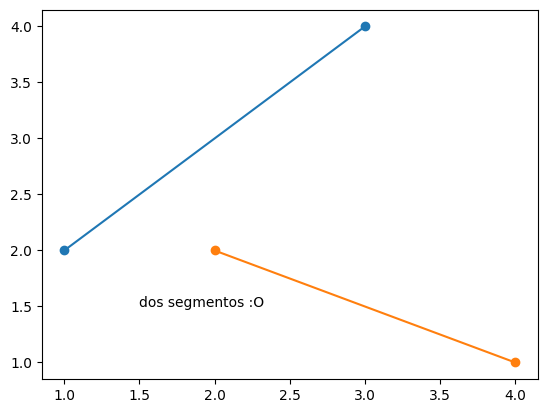

Punto de interseccion de las rectas: 1.6 2.6


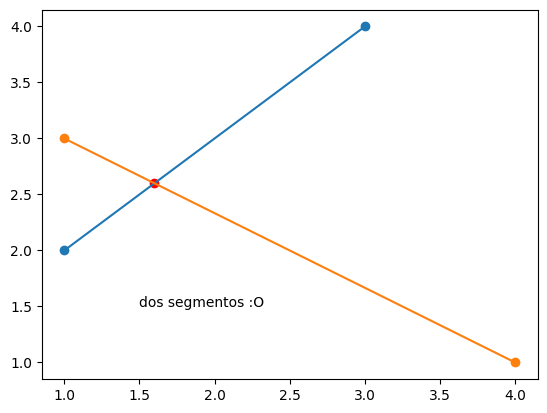

Las rectas son paralelas


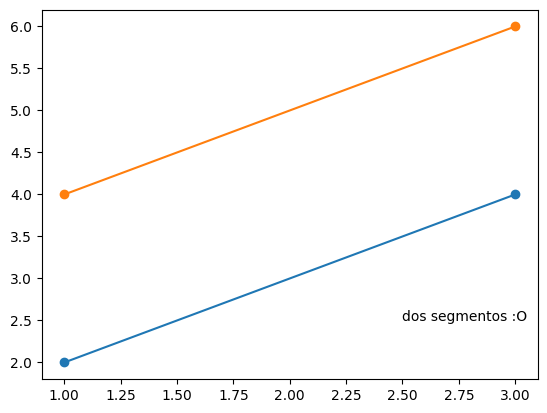

In [5]:
# Ejemplo para plot

# Recibe un segmento, formado por dos puntos:   [ [x1, y1 ], [x2, y2] ]
def plotSegment(segmento):
    # Scatter sirve para dibujar puntos, funciona con listas
    # Sintaxis: plt.scatter( vals_x, vals_y )
    plt.scatter([s[0] for s in segmento], [s[1] for s in segmento])

    # Plot sirve para dibujar lineas, funciona con listas tambien
    # Sintaxis: plt.plot( vals_x, vals_y, opciones )
    plt.plot([s[0] for s in segmento], [s[1] for s in segmento],  linestyle="-")

    # Text sirve para agregar textos
    # Sintaxis:  plt.text( x, y, text, opciones)
    #plt.text(  ,  ,   , color="b" )

def plotPoint(x, y):
    plt.scatter(x, y, color="r")

def writeInPlot( x, y, texto ):
    plt.text(x, y, texto)

# Caasos de prueba:

#	segmento 	p1       p2
S1 = [[1.0, 2.0],  [3.0, 4.0]]
S2 = [[2.0, 2.0],  [4.0, 1.0]]

intersection = recta_interseccion(S1, S2)

if(intersection):
    x, y = intersection
    print("Punto de interseccion de las rectas:", x, y)
    plotPoint(x, y)

plotSegment(S1)
plotSegment(S2)
writeInPlot(1.5, 1.5, "dos segmentos :O")
plt.show()


# Otros casos de prueba: con cruce
S1 = [[1.0, 2.0],  [3.0, 4.0]]
S2 = [[1.0, 3.0],  [4.0, 1.0]]

intersection = recta_interseccion(S1, S2)

if(intersection):
    x, y = intersection
    print("Punto de interseccion de las rectas:", x, y)
    plotPoint(x, y)

plotSegment(S1)
plotSegment(S2)
writeInPlot(1.5, 1.5, "dos segmentos :O")
plt.show()


# Otros casos de prueba: paralelas
S1 = [[1.0, 2.0],  [3.0, 4.0]]
S2 = [[1.0, 4.0],  [3.0, 6.0]]

intersection = recta_interseccion(S1, S2)

if(intersection):
    x, y = intersection
    print("Punto de interseccion de las rectas:", x, y)
    plotPoint(x, y)

plotSegment(S1)
plotSegment(S2)
writeInPlot(2.5, 2.5, "dos segmentos :O")
plt.show()